<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Data Analysis with Python</p><br>

<p style="font-family: Arial; font-size:2.75em;color:#45B39D; font-style:bold"><br>
Agenda</p><br>
<font size = 4>In this session, we are going to explore two datasets:</font>

    1. Portuguese school dataset, all codes are prepared to run. The only thing you need to do is clicking "Shift" and "Enter" simultaneously to run the code, and learn the process of data analysis with the explanation after #.
    
    2. Harvard and MIT MOOC dataset/your own dataset, the template of Portuguese school dataset will be reused. You can replace the variables(e.g. file name and column name) in the program according to your need.

<p style="font-family: Arial; font-size:2.75em;color:#45B39D; font-style:bold"><br>
Part 1: Portuguese School Dataset</p><br>
This dataset approachs student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected via school reports and questionnaires. The datasets are provided regarding the performance in Mathematics (mat) and modeled under binary/five-level classification and regression tasks.

we will have three stages to analyze the dataset:
    1. Descriptive Statistics
    2. Data Visualization
    3. Machine Learning

<p style="font-family: Arial; font-size:1.75em;color:#5DADE2; font-style:bold">
Stage 1: Descriptive Statistics</p>
<br>
*Descriptive statistics* are used to describe the basic features of the data in a study. They provide simple summaries about the sample and the measures.

<p style="font-family: Arial; font-size:1.25em;color:#B03A2E; font-style:bold">
Coding: click **"Shift"** and **"Enter"** simultaneously.</p>

In [8]:
# library import,First of all, import the toolkits/libraries we need.
import pandas as pd
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
print("Libraries imported")

Libraries imported


### 1.1. Load Data
load the dataset in excel format with *pd.read_excel*, and show the first 10 rows of the dataset to explore what the dataset looks like.<br><br>
              <b>Key syntax: pd.read_excel('file_name', sheetname='sheetname')</b>

<p style="font-family: Arial; font-size:1.25em;color:#B03A2E; font-style:bold">
Coding: click **"Shift"** and **"Enter"** simultaneously to run.</p>

In [3]:
# creat a new DataFrame 'df', and import the excel file in it
df = pd.read_excel('student data-mat.xlsx', sheetname='Data') 

# print the first 10 rows of DataFrame
df.head(10) 

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


### 1.2. First step of exploration
with the column name in the dataframe, we can select the whole column and analyze it with differnt methods provided by the toolkits. The basic format is *data.method(function)*, this format can be applied in most of python syntax.

** Key syntax: data['*column name*'].method **

<p style="font-family: Arial; font-size:1.25em;color:#B03A2E; font-style:bold">
Coding: click **"Shift"** and **"Enter"** simultaneously to run.</p>

In [12]:
# count the number of student from different schools
print (df['school'].value_counts()) 

# minimum value in the column “G3”
print ('minimum value:', df['G3'].min()) 

# maximum value in the column “G3”
print ('maximum value:',df['G3'].max()) 

# standard value of the column “G3”
print ('standard value:',df['G3'].std()) 

# mean of the column “G3”
print ('mean',df['G3'].mean()) 

GP    349
MS     46
Name: school, dtype: int64
minimum value: 0
maximum value: 20
standard value: 4.581442611
mean 10.4151898734


In [13]:
# we can use an all-in-one method "describe", to explore all column
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [14]:
# or we can specify one of the columns
df['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

<p style="font-family: Arial; font-size:1.75em;color:#5DADE2; font-style:bold">
Stage2: Data Visualization</p>
<br>
*Data Visualization* plays an important role in data analysis, it provides interactive, visual representations of abstract data to amplify cognition and facilitate understanding.

<p style="font-family: Arial; font-size:1.25em;color:#B03A2E; font-style:bold">
Coding: click **"Shift"** and **"Enter"** simultaneously to run.</p>

In [9]:
# import libraries
import matplotlib.pyplot as plt 
import numpy as np 

### 2.1.  How mamy student per school?
We like to count how mamy student per school. With *groupby('key')*, we can group the dataset based on the 'key' values. In this case, samples will be grouped according to the "school" value.<br>
** Key syntax: data.groupby('column_name') **

<p style="font-family: Arial; font-size:1.25em;color:#B03A2E; font-style:bold">
Coding: click **"Shift"** and **"Enter"** simultaneously to run.</p>

In [10]:
# Count how many students per school, store results in a table called 'school'
school = pd.DataFrame({'Count':df.groupby('school').size()}).sort('Count',ascending=False).reset_index()

# Show the created table
school

,school,Count
0,GP,349
1,MS,46


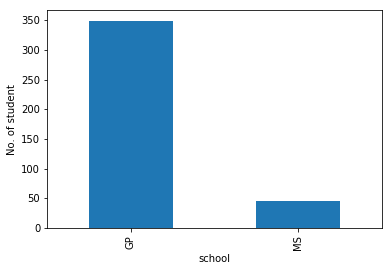

In [11]:
# plot count of students per school
school.plot(x="school", y="Count", kind="bar", figsize = (6,4), legend=False)
plt.ylabel('No. of student')
plt.xlabel('school')
plt.show()

<p style="font-family: Arial; font-size:1.75em;color:#5DADE2; font-style:bold">
Stage3: Data analysis with machine learning</p>
<br>
*Machine learning* is a subfield of artificial intelligence that explores how machines can learn from data to analyze structures, help with decisions, and make predictions. In this section, we will try to predict the performance group of a student (group one or group two) with the attributes collected. 

<p style="font-family: Arial; font-size:1.25em;color:#B03A2E; font-style:bold">
Coding: click **"Shift"** and **"Enter"** simultaneously to run.</p>

In [18]:
# import the libraries will be used
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

### 3.1. What is a predictive model?
several concepts in predictive model:

Input feature **X**: features/columns/attributes which will be used as input for prediction.

Target value **y**: the value to be predicted.

Predictive Model: predicting the target value **y** with given features **X** with a mathematical algorithm. In this case, we will try to predict student's category (above 15 or below 15) with current features before examination.

### 3.2. Devide students into two groups
we will create a new column "group" and fill the column beased on students' G3 (final grade), "One" represents students with final grade equals or above 15, Two represents students with final grade below 15.

<p style="font-family: Arial; font-size:1.25em;color:#B03A2E; font-style:bold">
Coding: click **"Shift"** and **"Enter"** simultaneously to run.</p>

In [15]:
df['group'] = pd.cut(df['G3'], [-1,14,20],labels=['Two','One'],right=True).copy() 
df['group'] = df['group'].astype(str)
df.head(5)

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,group
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Two
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Two
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Two
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,One
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Two


### 3.3. Data Slicing

Slicing means selecting a part of data, from row *i* to row *j*, from column *m* to column *n*. In this case, we will use **all rows**, from **column "school" to column "G2"** as input X. And use **the new created column "group"** as target value y.

**Key syntax: data.loc['row i':'row j', 'column m': 'column n']**

<p style="font-family: Arial; font-size:1.25em;color:#B03A2E; font-style:bold">
Coding: click **"Shift"** and **"Enter"** simultaneously to run.</p>

In [16]:
# X represents the features for input. Here, df is the data to be sliced, no rows need to be specified because we will use all rows (samples)
X = df.loc[:,'school':'G2'].copy()

# replace strings wilth numbers which will help machine in calculation
X.replace(['no','yes'],[0,1],inplace=True)
X.replace(['GP','MS'],[0,1],inplace=True)
X.replace(['F','M'],[0,1],inplace=True)
X.replace(['U','R'],[0,1],inplace=True)
X.replace(['LE3','GT3'],[0,1],inplace=True)
X.replace(['A','T'],[0,1],inplace=True)
X['Mjob'].replace(['other','at_home','services','health','teacher'],[1,2,3,4,5],inplace=True)
X['Fjob'].replace(['other','at_home','services','health','teacher'],[1,2,3,4,5],inplace=True)
X['reason'].replace(['home','reputation','course','other'],[1,2,3,4],inplace=True)
X['guardian'].replace(['mother','father','other'],[1,2,3],inplace=True)

# y represents the target value to be predicted
y = df['group'].copy()

### 3.4. Traning set and testing set
**Training set**: machine can "learn" from the training set (a subset of data), by giving the "questions"(features) and the correct "answers" (target values). Aftering training, the coeffients of algorithm will be optimized for this case.

**Testing set**: we reserve a testing set (a subset which not be used in training) which is new for the learned machine, and test the performance of the learned machine in prediction by comparing the true values and the predicted values.

<p style="font-family: Arial; font-size:1.25em;color:#B03A2E; font-style:bold">
Coding: click **"Shift"** and **"Enter"** simultaneously to run.</p>

In [17]:
# split the whole dataset into training set (2/3) and testing set(1/3) randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=0)

# select LinearSVC as the algorithm
clf = LinearSVC(random_state=0)

# start learning, this function will return the parameters of the selected algorithm
clf.fit(X_train, y_train)

NameError: name 'train_test_split' is not defined

In [ ]:
# use the learned model to predict the samples in testing set, and show the top ten rows
predictions = clf.predict(X_test)
predictions = pd.Series(predictions, index=y_test.index)
predictions.head(10)

In [ ]:
# calculate the accuracy with accuracy_score function
accuracy_score(y_true = y_test, y_pred = predictions)

<p style="font-family: Arial; font-size:2.75em;color:#45B39D; font-style:bold"><br>
Part 2: Harvard MOOC Dataset/Your Own Dataset</p><br>
In the following session, you may want to use the templates above with your own dataset. You can also use another dataset (Harvard and MIT MOOC) we provide for reference.

<button type="button" class="btn btn-success" data-toggle="collapse" data-target="#info1">
Learn more about the dataset</button>
<div id="info1" class="collapse">

About the dataset: Over the year from the fall of 2012 to the summer of 2013, HarvardX and MITx launched 17 courses on edX, a jointly-founded platform for delivering massive open online courses (MOOCs). In that year, 43,196 registrants earned certificates of completion. Another 35,937 registrants explored half or more of course content without certification. An additional 469,702 registrants viewed less than half of the content. And 292,852 registrants never engaged with the online content. In total, there were 841,687 registrations from 597,692 unique users across the first year of HarvardX and MITx courses.
The whole dataset has more than 60,000 samples, we created a subset of the first 10,000 samples and use it in the following section. Please find more datails at: https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2381263

</div>

<font color = "red" size = 5>! Something you need to know before you start</font><br>
Please read <font color =#117A65 size = 3>the hints after # </font> in each cell, and replace the string <font color =#B03A2E size = 3>"please fill the XXX here"</font> with your needed value. Otherwise, the program will return error.

<p style="font-family: Arial; font-size:1.25em;color:#B03A2E; font-style:bold">
Coding: click **"Shift"** and **"Enter"** simultaneously to run.</p>

In [1]:
# creat a new DataFrame 'df1', please replace the string with file name and sheet name
df1 = pd.read_excel('please fill the file name here', sheetname='please fill the sheet name in the file here') 
df1.head(10)

NameError: name 'pd' is not defined

<button type="button" class="btn btn-primary" data-toggle="collapse" data-target="#ans1">
Click here for solution</button>
<div id="ans1" class="collapse">
<p style="color:#0033cc"><b>df1 = pd.read_excel(HMXPC.xlsx', sheetname='Sheet1') </b></p>
The solution is for the Harvard dataset we provide, if you are using your own dataset, please revise the file name and make sure the file and the script should be under the same folder.
</div>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Stage 1: Descriptive statistics</p>

<p style="font-family: Arial; font-size:1.25em;color:#B03A2E; font-style:bold">
Coding: click **"Shift"** and **"Enter"** simultaneously to run.</p>

In [ ]:
# count the number of student from different countries
print (df1['please fill the column name here'].value_counts()) 

# minimum value in the column “ndays_act”
print ('minimum value:', df1['please fill the column name here'].min()) 

# maximum value in the column “ndays_act”
print ('maximum value:',df1['please fill the column name here'].max()) 

# standard value of the column “ndays_act”
print ('standard value:',df1['please fill the column name here'].std()) 


<button type="button" class="btn btn-primary" data-toggle="collapse" data-target="#ans2">
Click here for solution</button>
<div id="ans2" class="collapse">
<p style="color:#0033cc"><b>print (df1['final_cc_cname_DI'].value_counts()) </b></p>
<p style="color:#0033cc"><b>print ('minimum value:', df1['ndays_act'].min())</b></p>
<p style="color:#0033cc"><b>print ('maximum value:', df1['ndays_act'].max())</b></p>
<p style="color:#0033cc"><b>print ('standard value:', df1['ndays_act'].std())</b></p>
</div>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Stage 2:Data Visualization</p>

<p style="font-family: Arial; font-size:1.25em;color:#B03A2E; font-style:bold">
Coding: click **"Shift"** and **"Enter"** simultaneously to run.</p>

In [ ]:
# Count how many students per country, store results in a table called 'country'
country = pd.DataFrame({'Count':df1.groupby('please fill in the column name of "country" here').size()}).sort('Count',ascending=False).reset_index()

# Show the first 5 rows of the created table
country.head()

<button type="button" class="btn btn-primary" data-toggle="collapse" data-target="#ans3">
Click here for solution</button>
<div id="ans3" class="collapse">
<p style="color:#0033cc"><b>education = country = pd.DataFrame({'Count' :df1.groupby('final_cc_cname_DI').size()}).sort('Count',ascending=False).reset_index() </b></p>
</div>

In [ ]:
# plot the bar chart
country.plot(x="please fill in the column name of "country" here", y="Count", kind="bar", figsize = (6,4), legend=False)
plt.ylabel('Countries')
plt.xlabel('Frequency')
plt.show()

<button type="button" class="btn btn-primary" data-toggle="collapse" data-target="#ans4">
Click here for solution</button>
<div id="ans4" class="collapse">
<p style="color:#0033cc"><b>education.plot(x="LoE_DI", y="Count", kind="bar", figsize = (6,4), legend=False) </b></p>
</div>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Stage 3: Machine Learning</p>

<p style="font-family: Arial; font-size:1.25em;color:#B03A2E; font-style:bold">
Coding: click **"Shift"** and **"Enter"** simultaneously to run.</p>

In [ ]:
# we will use columns "nevents" to "nplay_video" to predict the "incomplete flag"
X1 = df1.loc[:,'please fill the name of column1 here':'please fill the name of column2 here'].copy()
y1 = df['please fill the name of target value here'].copy()

# replace na values with 0

X1.fillna(value=0, inplace=True)
y1.fillna(value=0, inplace=True)

<button type="button" class="btn btn-primary" data-toggle="collapse" data-target="#ans5">
Click here for solution</button>
<div id="ans5" class="collapse">
<p style="color:#0033cc"><b>X1 = df1.loc[:,'nevents':'nplay_video'].copy()
</b></p>
<p style="color:#0033cc"><b>y1 = df1['incomplete_flag'].copy()</b></p>
</div>

In [5]:
# split the whole dataset into training set (2/3) and testing set(1/3) randomly
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33,random_state=0)

# select LinearSVC as the algorithm
clf1 = LinearSVC(random_state=0)

# start learning, this function will return the parameters of the selected algorithm
clf1.fit(X1_train, y1_train)

NameError: name 'train_test_split' is not defined

In [ ]:
# generate predictions
predictions1 = clf1.predict(X1_test)
predictions1 = pd.Series(predictions1, index=y1_test.index)

# calculate the accuracy with accuracy_score function
accuracy_score(y_true = y1_test, y_pred = predictions1)